<a href="https://colab.research.google.com/github/Harshnagwani123/ML_TRAINING/blob/main/SMS_SPAM_DETECTION_USING_NAIVE_BAYES_AND_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder , StandardScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score , classification_report

In [2]:
url_sms = "https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv"

In [4]:
sms = pd.read_csv(url_sms, sep='\t', names=["label", "message"])


print(sms.head())

  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [5]:
X = sms["message"]
y = sms["label"]

In [6]:
vectorizer = CountVectorizer()
X_vec = vectorizer.fit_transform(X)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.2, random_state=42)

In [8]:
MNB = MultinomialNB()

In [9]:
MNB.fit(X_train,y_train)

MultinomialNB()

In [10]:
y_prid = MNB.predict(X_test)

In [11]:
print("NM MOdel on Spam SMS DATA")
print("Accuracy : ",accuracy_score(y_test,y_prid))
acc_nb = accuracy_score(y_test,y_prid)
print("\nNaive Bayes Report : \n", classification_report(y_test,y_prid))

NM MOdel on Spam SMS DATA
Accuracy :  0.9856502242152466

Naive Bayes Report : 
               precision    recall  f1-score   support

         ham       0.99      0.99      0.99       966
        spam       0.94      0.95      0.95       149

    accuracy                           0.99      1115
   macro avg       0.97      0.97      0.97      1115
weighted avg       0.99      0.99      0.99      1115



In [12]:
svm = SVC(kernel="linear")

In [13]:
svm.fit(X_train,y_train)

SVC(kernel='linear')

In [14]:
y_prid2 = svm.predict(X_test)

In [15]:
print("SVM on Spam SMS DATA ")
print("Accuracy : ",accuracy_score(y_test,y_prid2))
acc_svm = accuracy_score(y_test,y_prid2)
print("\nSVM Report\n",classification_report(y_test,y_prid2))

SVM on Spam SMS DATA 
Accuracy :  0.989237668161435

SVM Report
               precision    recall  f1-score   support

         ham       0.99      1.00      0.99       966
        spam       1.00      0.92      0.96       149

    accuracy                           0.99      1115
   macro avg       0.99      0.96      0.98      1115
weighted avg       0.99      0.99      0.99      1115



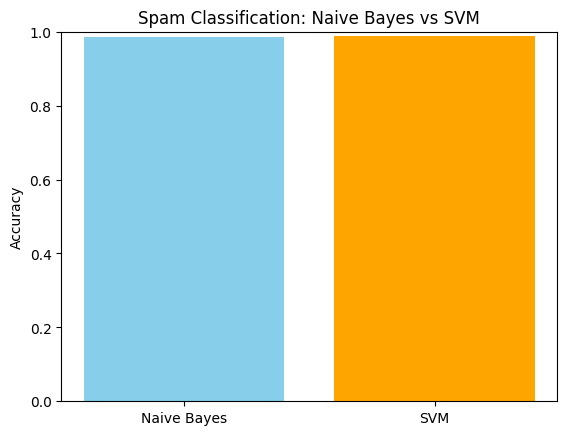

In [16]:
models = ["Naive Bayes", "SVM"]
accuracies = [acc_nb, acc_svm]

plt.bar(models, accuracies, color=['skyblue', 'orange'])
plt.ylabel("Accuracy")
plt.title("Spam Classification: Naive Bayes vs SVM")
plt.ylim(0, 1)
plt.show()